**In this exam, you will use the CIFAR-10 dataset, a widely-used benchmark dataset in the field of computer vision.**

Step 1: Load and Preprocess the CIFAR-10 Dataset & import needed libraries

In [ ]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

Step 2 : Data Preparation:

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step


Step 3: Define the CNN Architecture and Compile the Model:

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Step 4: Train the Model

In [4]:
model.fit(x_train, y_train, epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.4990 - accuracy: 0.4553 - val_loss: 1.2830 - val_accuracy: 0.5330
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1333 - accuracy: 0.5989 - val_loss: 1.0517 - val_accuracy: 0.6262
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9862 - accuracy: 0.6549 - val_loss: 0.9828 - val_accuracy: 0.6575
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8990 - accuracy: 0.6856 - val_loss: 0.9328 - val_accuracy: 0.6774
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8198 - accuracy: 0.7143 - val_loss: 0.9076 - val_accuracy: 0.6879
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7595 - accuracy: 0.7343 - val_loss: 0.9088 - val_accuracy: 0.6859
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7070 - accuracy: 0.7545 - val_loss: 0.8936 -

Step 5: Model Evaluation:

- Evaluate the model: Use the test dataset to evaluate the model’s accuracy and performance metrics.
- Plot results: Visualize training and validation accuracy and loss.

313/313 - 3s - loss: 0.9200 - accuracy: 0.6992 - 3s/epoch - 10ms/step
Test accuracy: 0.6992
Epoch 1/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5533 - accuracy: 0.8058 - val_loss: 0.8981 - val_accuracy: 0.7100
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5199 - accuracy: 0.8155 - val_loss: 0.9233 - val_accuracy: 0.7016
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4865 - accuracy: 0.8287 - val_loss: 0.9156 - val_accuracy: 0.7158
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4587 - accuracy: 0.8387 - val_loss: 0.9569 - val_accuracy: 0.7044
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4315 - accuracy: 0.8463 - val_loss: 1.0020 - val_accuracy: 0.7109
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4049 - accuracy: 0.8564 - val_loss: 1.0476 - val_accuracy: 0.7035
Epoch 7/10
1563/1563 [==========

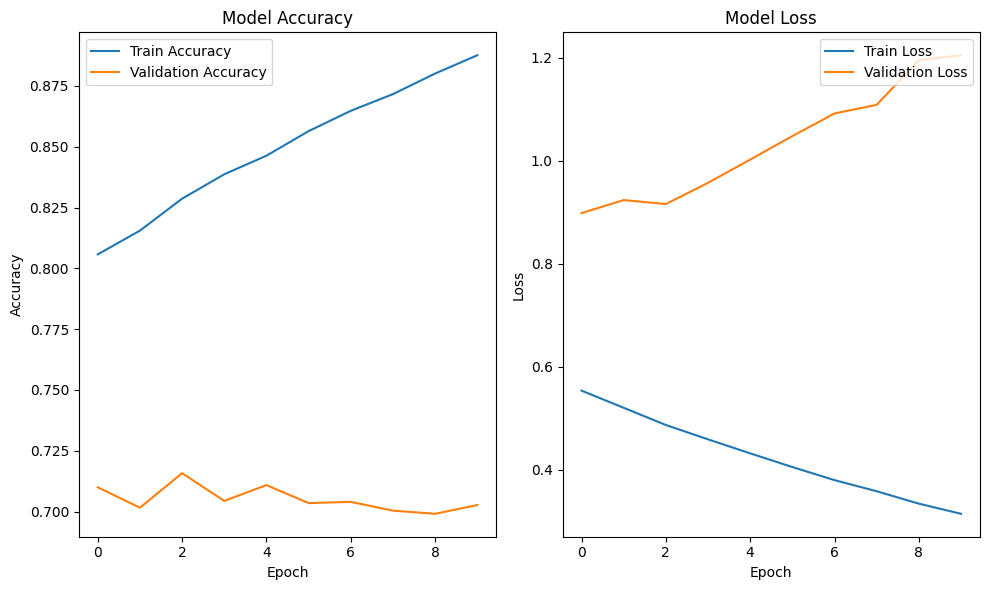

In [8]:
# تقييم النموذج
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# التحقق من تاريخ التدريب
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# رسم النتائج
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# رسم دقة التدريب والتحقق
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# رسم خسارة التدريب والتحقق
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Step 6: Model Improvement:

- Experimentation: Try different architectures, hyperparameters, and data augmentation techniques to enhance model performance.
- Regularization

In [12]:
# Step 6: Model Improvement

# 1. Try different architectures
# Example: Add more convolutional and dense layers
model_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 2. Add data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# 3. Experiment with hyperparameters
model_v2.fit(datagen.flow(x_train, y_train, batch_size=32),
              epochs=20,
              validation_data=(x_test, y_test),
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])

# 4. Apply regularization techniques
from tensorflow.keras import regularizers
model_v3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_v3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_v3.fit(datagen.flow(x_train, y_train, batch_size=32),
              epochs=20,
              validation_data=(x_test, y_test),
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])

Epoch 1/20
1563/1563 [==============================] - 98s 62ms/step - loss: 1.7572 - accuracy: 0.0960 - val_loss: 1.4033 - val_accuracy: 0.0438
Epoch 2/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4559 - accuracy: 0.0929 - val_loss: 1.2847 - val_accuracy: 0.0790
Epoch 3/20
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3408 - accuracy: 0.0927 - val_loss: 1.1780 - val_accuracy: 0.0948
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2642 - accuracy: 0.0977 - val_loss: 1.0785 - val_accuracy: 0.0615
Epoch 5/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2050 - accuracy: 0.0992 - val_loss: 1.0538 - val_accuracy: 0.0945
Epoch 6/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1663 - accuracy: 0.0990 - val_loss: 1.0747 - val_accuracy: 0.0977
Epoch 7/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.1310 - accuracy: 0.1001 - val_loss: 1.0022 -

Step 7: Make Predictions (optional):

In [15]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 11ms/step
